# 개요
2장에서 주택 가격 예측을 통해 회귀를 알아보았다면    
3장에서는 숫자 이미지 인식을 통해 분류를 알아봅니다.

1. MNIST
1. 이진분류
1. 교차 검증을 사용한 정확도 측정
1. 오차 행렬
1. Precision / Recall
1. Trade-off
1. ROC

---
# <span style="color:green">CHAPTER 3 분류(Classification)</span>

## 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

---
# <span style="color:green">3.1 MNIST</span>

- 머신러닝계의 "Hello World"
- 미국의 고등학교와 인구조사국 직원들이 쓴 70,000개의 작은 숫자 이미지

MNIST에 대해 알아봅니다.

In [2]:
# MNIST 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
type(mnist)

sklearn.utils.Bunch

In [6]:
sklearn.utils.Bunch.mro()

[sklearn.utils.Bunch, dict, object]

In [7]:
print(id(mnist["data"]) == id(mnist.data))
print(id(mnist["frame"]) == id(mnist.frame))
print(id(mnist["feature_names"]) == id(mnist.feature_names))
print(id(mnist["target_names"]) == id(mnist.target_names))
print(id(mnist["DESCR"]) == id(mnist.DESCR))
print(id(mnist["details"]) == id(mnist.details))
print(id(mnist["categories"]) == id(mnist.categories))
print(id(mnist["url"]) == id(mnist.url))

True
True
True
True
True
True
True
True


In [8]:
# data
print(type(mnist.data))
print(mnist.data.shape)
print(28*28)
print(mnist.data[7])

<class 'numpy.ndarray'>
(70000, 784)
784
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.  43. 105.
 255. 253. 253. 253. 253. 253. 174.   6.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  43. 139. 224. 226. 252.
 253. 252. 252. 252. 252. 252. 252. 

In [9]:
# target
print(type(mnist.target))
print(mnist.target.shape)
print(mnist.target[0:20])

<class 'numpy.ndarray'>
(70000,)
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


In [10]:
# frame
type(mnist.frame)

NoneType

In [11]:
# feature_names
print(type(mnist.feature_names))
print(len(mnist.feature_names))
print(mnist.feature_names[0:5])

<class 'list'>
784
['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']


In [12]:
# target_names
print(type(mnist.target_names))
print(len(mnist.target_names))
print(mnist.target_names[0])

<class 'list'>
1
class


In [13]:
# DESCR
print(type(mnist.DESCR))

<class 'str'>


In [14]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [15]:
# details
print(type(mnist.details))
mnist.details

<class 'dict'>


{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [16]:
# categories
print(type(mnist.categories))
print(len(mnist.categories))
print(mnist.categories)

<class 'dict'>
0
{}


In [17]:
# url
print(type(mnist.url))
print(mnist.url)

<class 'str'>
https://www.openml.org/d/554


data
- type: numpy.ndarray
- shape: 70000, 784
- 28*28픽셀로 이루어진 숫자 이미지 70000개
- 이미지는 흑백으로 픽셀의 값은 0~255

target
- type: numpy.ndarray
- shape: 70000,
- data의 label, 범위는 0~9

frame
- type: None

feature_names
- type: list
- len: 784
- data의 각 픽셀의 name

target_names
- type: list
- len: 1
- target_names[0]: 'class'

DESCR
- type: str
- mnist에 대한 설명

details
- type: dict
- mnist의 상세 정보

categories
- type: dict
- len: 0

url
- type: str

데이터를 가져오고 확인합니다.

In [18]:
# 데이터 가져오기
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

그림 저장: some_digit_plot


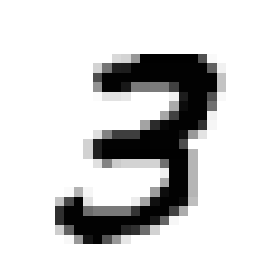

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [20]:
y[7]

'3'

label이 str이기 때문에 정수형으로 바꿔줍니다.

In [21]:
type(y[7])

str

In [22]:
y = y.astype(np.uint8)

In [23]:
# 이미지 하나 출력 함수 
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

interpolation="nearest"  
https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html

In [24]:
# 여러 이미지 출력 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장: more_digits_plot


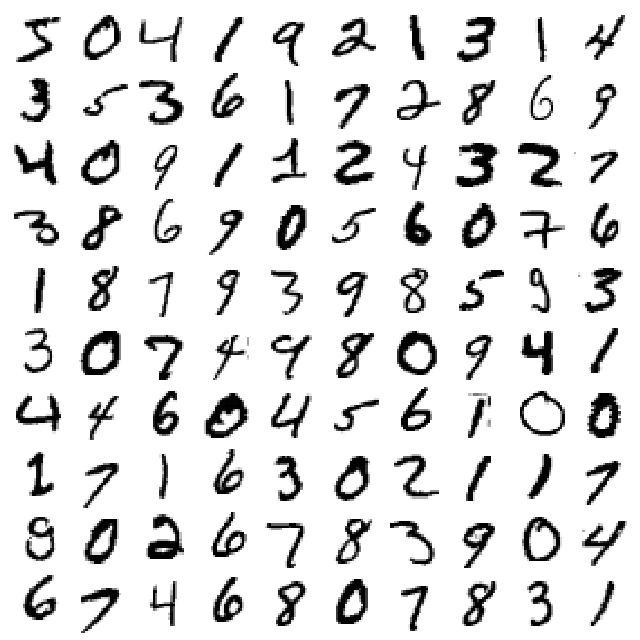

In [25]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

학습을 위해 데이터를 train set과 test set으로 나누어 줍니다.  
MNIST는 70000개의 데이터 중 앞 60000개를 train set으로, 뒤 10000개를 test set으로 사용할 수 있도록 나누어져있으므로 따로 섞지 않아도 됩니다.

In [26]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
# <span style="color:green">3.2 이진 분류기 훈련</span>

0부터 9까지 10가지로 분류하는 다중 분류를 들어가기 전에 문제를 단순화하여 이진 분류부터 보겠습니다.  
숫자 5를 식별하는 5-감지기를 만들어 봅시다.

우선 이진 분류이기 때문에 label을 True, False로 만들어 줍니다.

In [27]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [28]:
print(type(y_train_5))
print(len(y_train_5))
print(y_train_5)

<class 'numpy.ndarray'>
60000
[ True False False ...  True False False]


분류 모델로 scikit-learn의 SGDClassifier를 사용합니다.

In [29]:
from sklearn.linear_model import SGDClassifier

# SGD를 통해 반복 횟수가 1000이거나, 오차가 0.001보다 작을 때까지 학습
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
sgd_clf.predict([some_digit])

array([False])

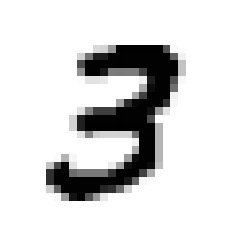

In [31]:
some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

---
# <span style="color:green">3.3 성능 측정</span>

---
## <span style="color:royalblue">3.3.1 교차 검증을 사용한 정확도 측정</span>

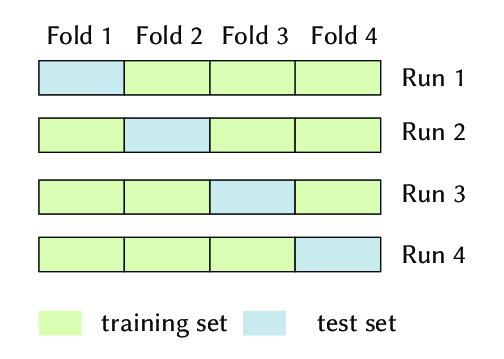
(정확히는 test set이 아닌 validation set)

다음은 scikit-learn의 교차 검증을 이용한 결과입니다.

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

간혹 라이브러리에서 제공하는 기능보다 더 많은 것을 해야할 때가 있습니다.  
그럴 때를 대비하여 직접 교차 검증 만들어봅니다.  
다음 코드는 scikit-learn의 cross_val_score() 함수와 거의 유사한 함수입니다.  

링크는 scikit-learn의 cross_val_score()의 코드 입니다.  
https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/model_selection/_validation.py#L275

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=44, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96095
0.96475
0.9654


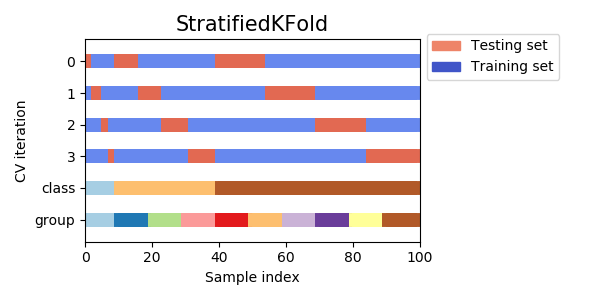
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

StratifiedKFold에서 n_splits=3으로 3 Fold이고 크기가 60000인 train set에 적용하였으므로 각 Fold의 크기는 20000입니다.

In [34]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index.shape, test_index.shape)

(40000,) (20000,)
(40000,) (20000,)
(40000,) (20000,)


이를 통해 scikit-learn의 cv나 직접 만든 cv나 accuracy를 보면 95%이상입니다.  
모델을 무척 잘 만든 것으로 보입니다만 이는 skewed data의 허점입니다.

In [35]:
print(len(y_train_5[y_train_5 == True]))
print(len(y_train_5[y_train_5 == False]))
len(y_train_5[y_train_5 == False]) / len(y_train_5)

5421
54579


0.90965

전체 60000개의 데이터 5421개가 True, 54579개가 False이므로 모든 데이터에 대해 False로 예측하는 모델조차도 90%의 정확도가 나옵니다.  
모든 이미지를 5가 아니라고 예측하는 분류기를 통해 확인해봅니다.

In [36]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

보았듯이 모두 False로 분류하는 분류기 조차도 정확도가 90%이상입니다.  
이를 통해 skewed data에 대해 모델의 성능을 평가할 때 Accuracy가 적합하지 않다는 것을 알 수 있습니다.  
그렇기에 이와 같은 분류 모델은 Accuracy를 사용하지 않고 다른 성능 평가 지표를 사용합니다.

---
## <span style="color:royalblue">3.3.2 오차 행렬</span>

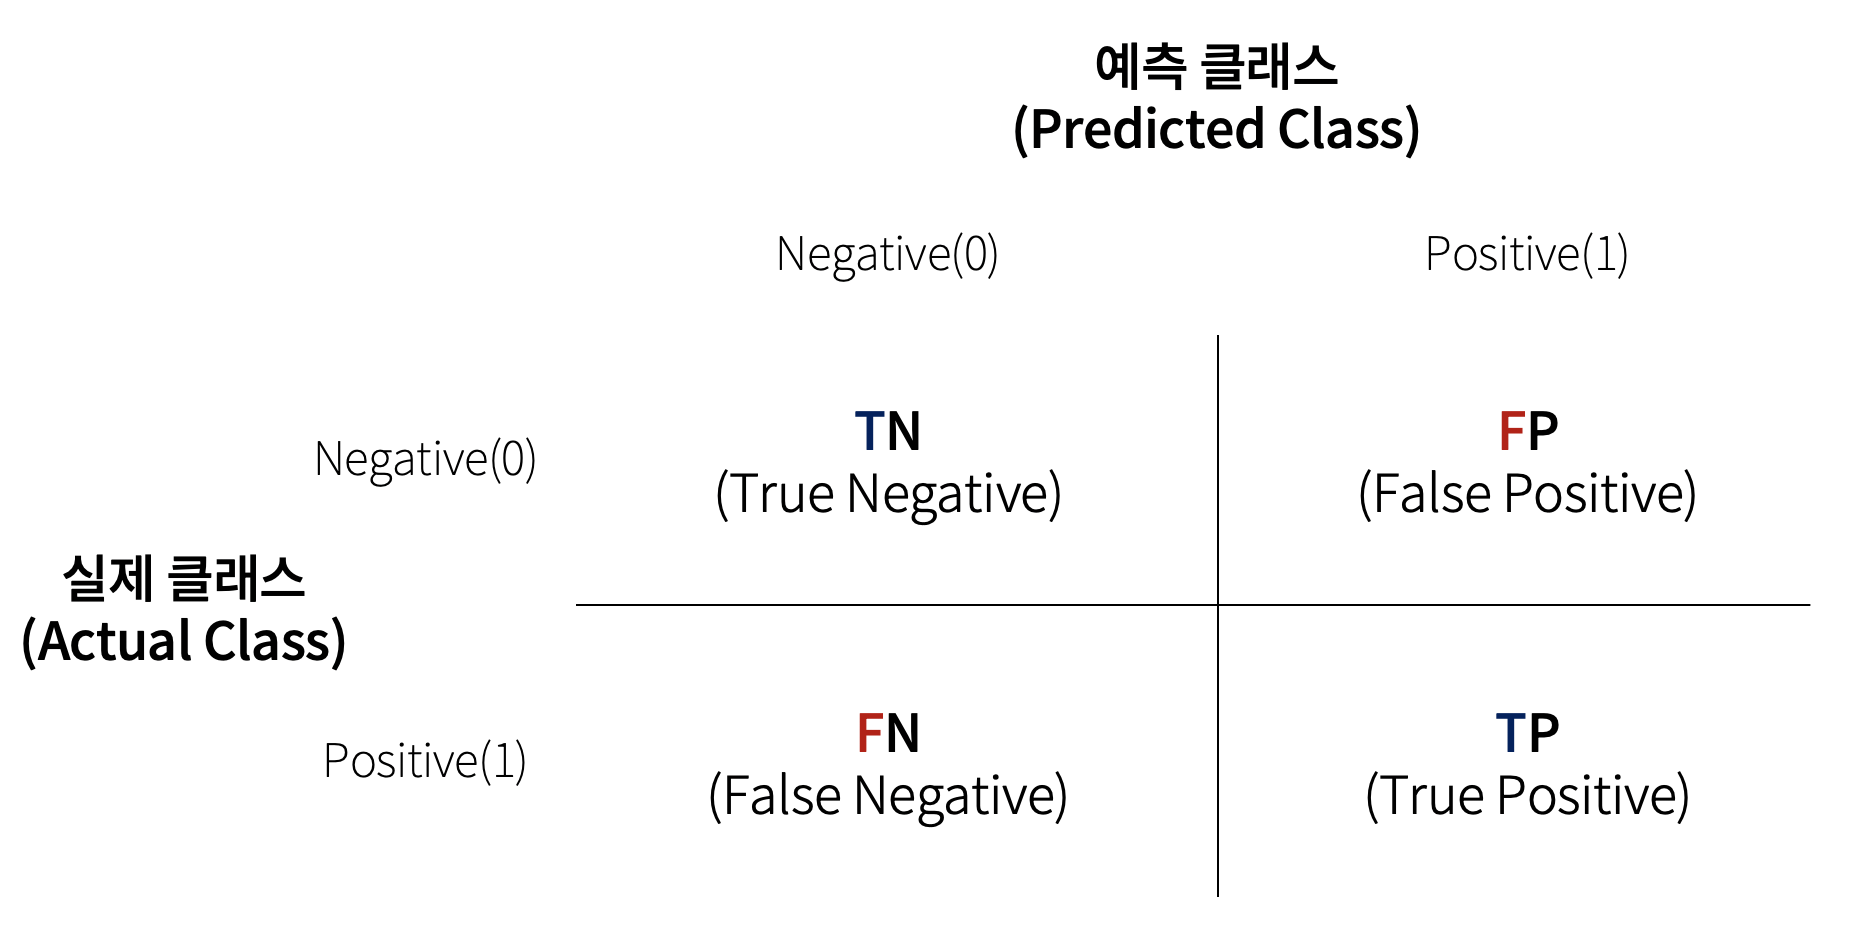

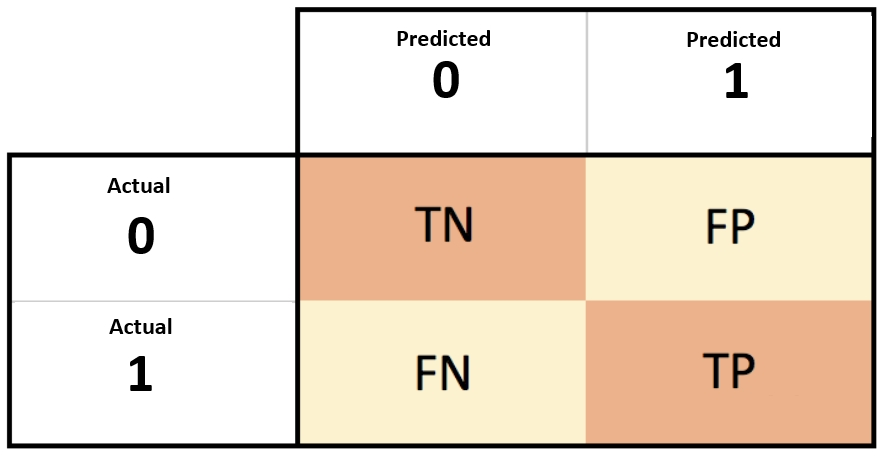

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

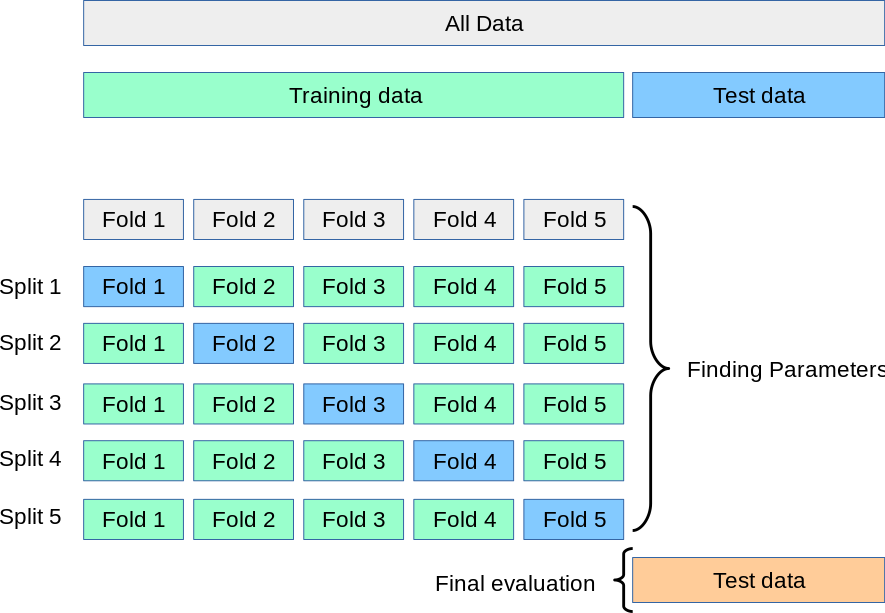

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

완벽한 분류기라면 다음과 같이 나올 것입니다.

In [40]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

---
## <span style="color:royalblue">3.3.3 정밀도와 재현율(Precision & Recall)</span>

---
## <span style="color:royalblue">정밀도(Precision)</span>

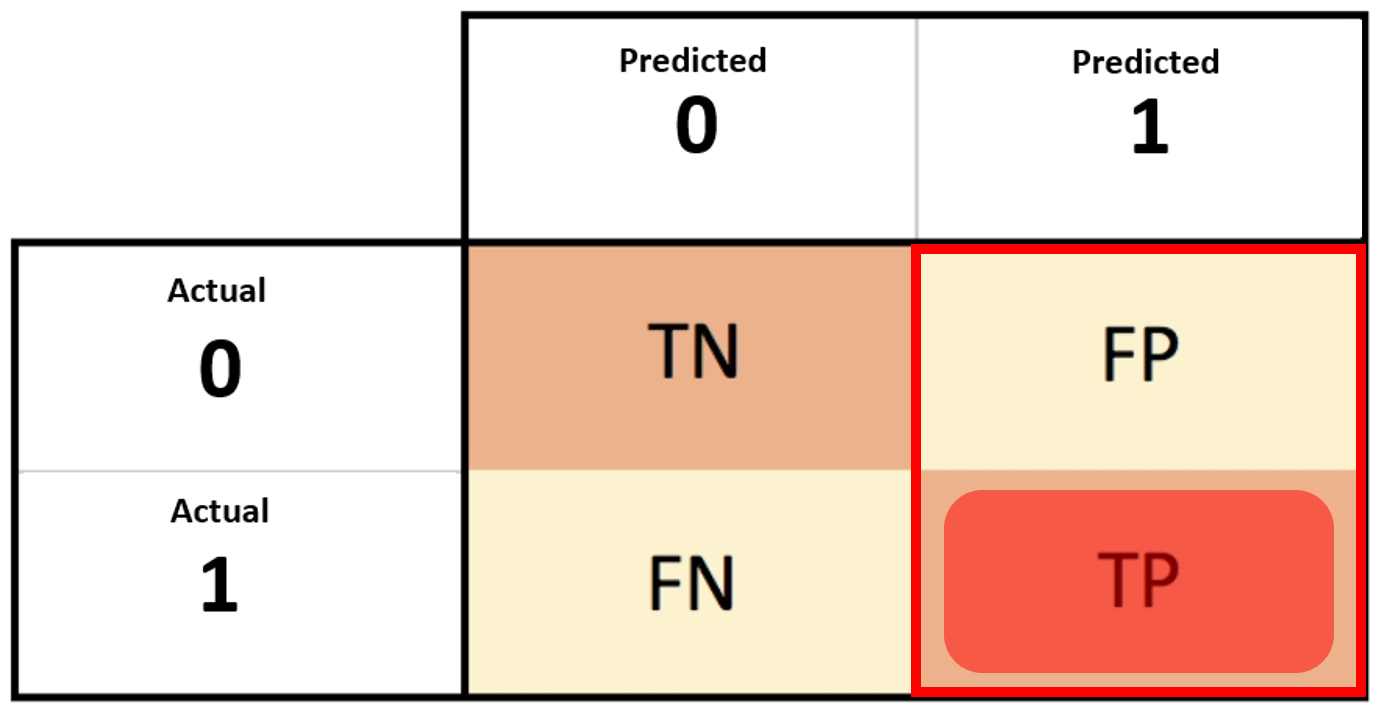
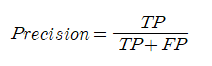

In [41]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [42]:
3530 / (3530 + 687)

0.8370879772350012

정밀도는 True로 예측한 것 중 실제 True의 비율이므로  
실제 True를 얼마나 놓친지(FN)는 알 수 없고  
True 예측이 얼마나 틀렸는지(FP)에만 관심이 있습니다.  

즉 FN은 높아도 영향을 받지 않고 FP가 낮을수록 높게 나옵니다.  
따라서 조심스럽게 정말 확실한 것만 True로 예측하면 정밀도는 높게 나오게 됩니다.

---
## <span style="color:royalblue">재현율(Recall)</span>

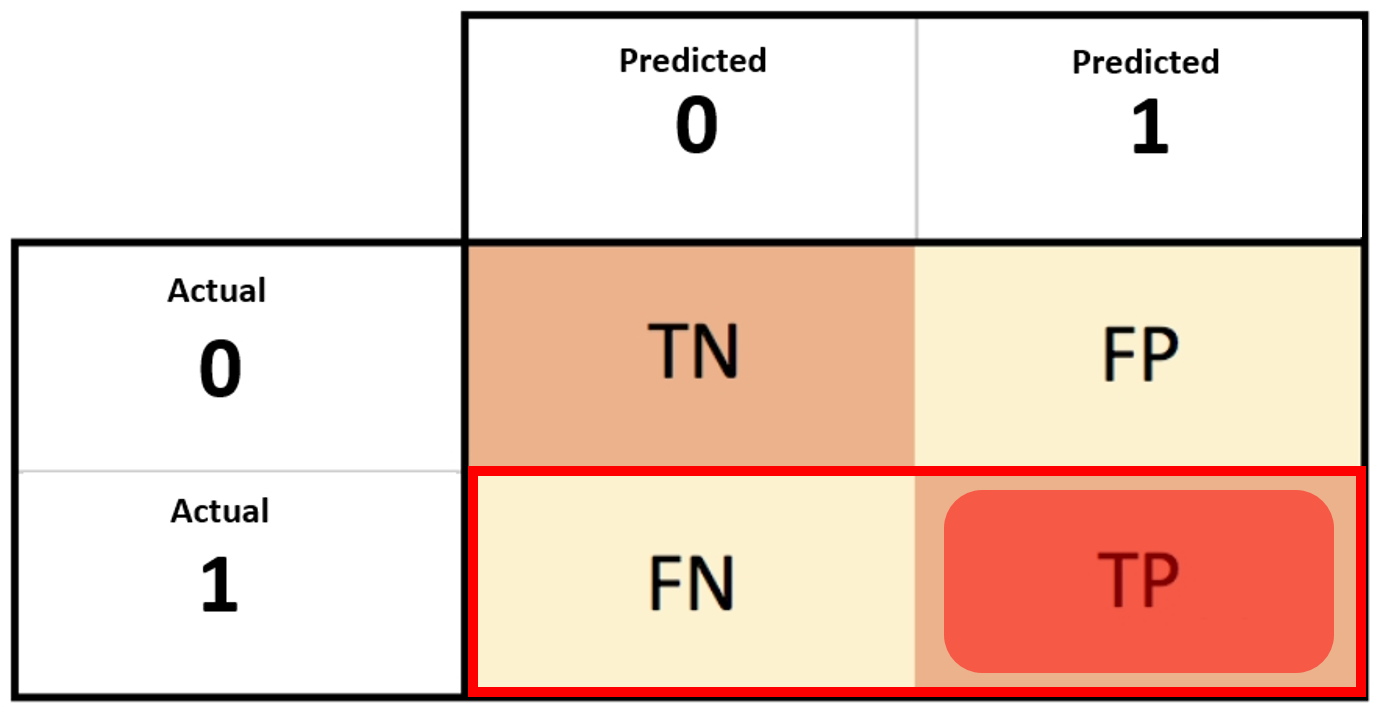
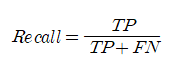

In [43]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [44]:
3530 / (3530 + 1891)

0.6511713705958311

재현율은 실제 True 중 True로 예측한 것의 비율이므로  
True 예측이 얼마나 틀렸는지(FP)는 알 수 없고  
실제 True를 얼마나 놓친지(FN)에만 관심이 있습니다.  

즉 FP는 높아도 영향을 받지 않고 FN이 낮을수록 높게 나옵니다.  
따라서 전부 True로 예측하면 1이 나오게 됩니다.

정밀도와 재현율 중 하나만으로는 성능 평가를 할 수 없다는 것을 알았습니다.  
따라서 둘을 활용하는 평가 지표인 F1-Score에 대해 알아봅니다.

---
## <span style="color:royalblue">F1-Score</span>

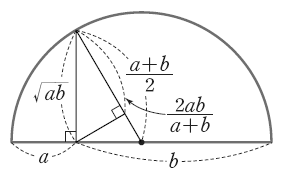

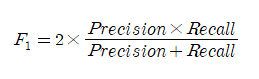
식으로 나타내면 위와 같고 F1-score는 precision과 recall의 조화평균입니다.  
precision과 recall의 합이 작을수록  
precision과 recall의 곱이 클수록 커집니다.  
따라서 일반적으로 precision과 recall이 비슷할수록 F1-Score는 높습니다.

In [45]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

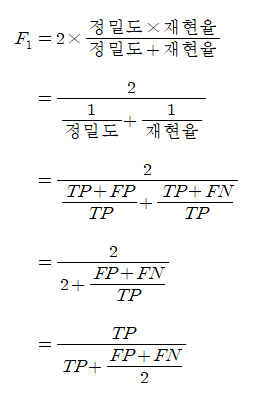

In [46]:
3530 / (3530 + (687 + 1891) / 2)

0.7325171197343847

하지만 항상 precision과 recall이 중요도가 같은 것은 아닙니다.  
경우에 따라서 precision이 더 중요할 수도 있고 recall이 더 중요할 수도 있을 것입니다.

예를 들면 스팸메일을 분류하는 분류기는 __스팸메일을 일반메일함으로 넣는 일(FN)__이 있더라도  
__일반메일을 스팸메일함에 넣으면(FP)__ 안될 것입니다. 이럴 땐 precision이 더 중요하고  
암을 진단하는 분류기는 __비환자를 환자로 분류하는 일(FP)__이 있더라도  
__환자를 비환자로 분류하는 일(FN)__이 있으면 안될 것입니다. 이럴 땐 Recall이 더 중요합니다.

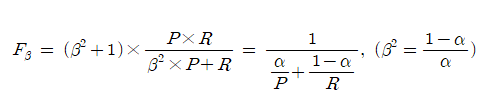
F1-score는 beta가 1인 F-score입니다.  
beta가 1보다 크면 Recall의 가중치가 커지고  
1보다 작으면 Precision의 가중치가 커집니다.

무엇보다 가장 좋은 것은 precision과 recall이 둘 다 높은 것이겠지만  
precision이 높아지면 recall이 낮아지고  
recall이 높아지면 precision이 낮아집니다.  
이를 **정밀도/재현율 트레이드오프**라고 합니다.

---
## <span style="color:royalblue">3.3.4 정밀도/재현율 트레이드오프(Precision/Recall Tradeoff)</span>

decision_function을 통해 샘플의 점수를 계산합니다.

In [47]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-4988.52407755])

decision_function(self, X)
- Predict confidence scores for samples.
- The confidence score for a sample is the signed distance of that sample to the hyperplane.
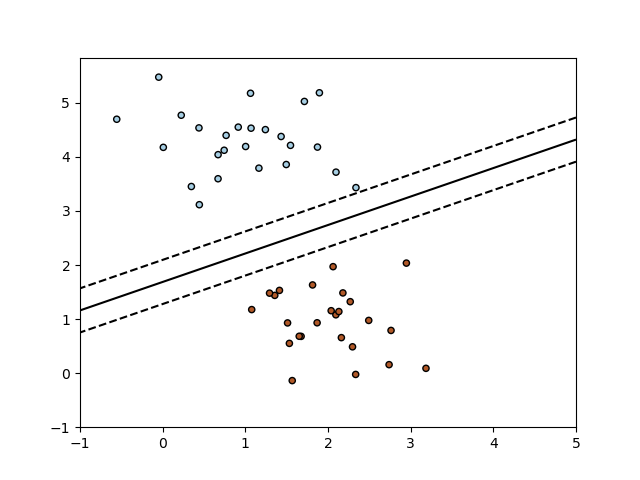

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function  
https://scikit-learn.org/stable/modules/sgd.html  
https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/linear_model/_base.py#L261

In [48]:
threshold = -5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [49]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

threshold를 높이면 precision이 올라가고 recall이 내려간다는 것과  
threshold를 낮추면 precision이 내려가고 recall이 올라간다는 것을 예상할 수 있습니다.

다음은 train set 전체에 대해 precision, recall, threshold의 관계를 알아봅니다.

In [50]:
# 모든 train set에 대해 거리를 측정합니다.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [51]:
# 모든 train set에 대해 precisions, recalls, thresholds를 계산합니다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [52]:
y_train_5.shape, y_scores.shape, thresholds.shape, precisions.shape, recalls.shape

((60000,), (60000,), (59966,), (59967,), (59967,))

In [53]:
y_scores_sorted = sorted(y_scores, reverse=True)
thresholds_sorted = sorted(thresholds, reverse=True)
print(y_scores_sorted[:4])
print(thresholds_sorted[:4])

[49441.43765904775, 42216.05562787437, 38871.26391927133, 37026.251165025424]
[49441.43765904775, 42216.05562787437, 38871.26391927133, 37026.251165025424]


In [54]:
# y_scores.shape - thresholds.shape = 34
print(y_scores_sorted[-4-34:-34])
print(thresholds_sorted[-4:])

[-104799.72132607448, -105406.2965229048, -105763.22240073659, -106527.45300471177]
[-104799.72132607448, -105406.2965229048, -105763.22240073659, -106527.45300471177]


y_scores와 thresholds의 크기가 다른 것을 볼 수 있는데 개수차이를 빼면 내용은 같습니다.  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [55]:
len(np.unique(y_scores))

60000

그림 저장: precision_recall_vs_threshold_plot


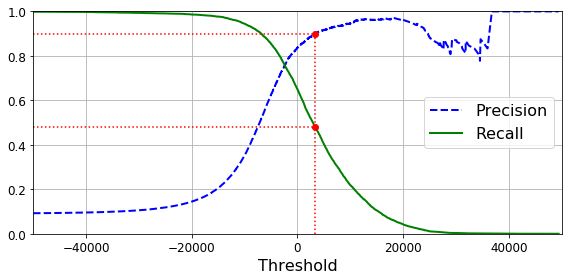

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

# precisions >= 0.90 -> bool type ndarray
# np.argmax(precisions >= 0.90)
# -> precisions >= 0.90에서 최댓값이 True를 처음 만나는 인덱스 반환
# -> precisions >= 0.90을 만족하는 첫 인덱스 반환
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

그래프에 우측 상단을 보면 울퉁불퉁한 모습을 보입니다. 이에 대해 설명하자면  
threshold가 최대가 되면 모델이 전부 False로 예측할 것이고  
threshold가 최소가 되면 모델이 전부 True로 예측할 것입니다.  
이를 Recall에 대해 생각한다면 threshold가 증가할수록 TP는 감소하고 FN은 증가하기 때문에 Recall은 줄어들기만 합니다.  
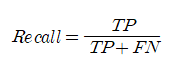  
하지만 Precision에 대해 생각한다면 threshold가 증가할수록 TP도 감소하고 FP도 감소하기 때문에 Precision이 늘어나기도 하고 줄어들기도 합니다.  
다만 일반적으로 증가합니다.  
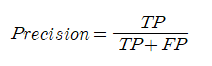

In [57]:
# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)  
(y_train_pred == (y_scores > 0)).all()

True

y_train_pred는 y_scores를 0을 기준으로 한 것과 같습니다.

---
이번엔 train set 전체에 대해 precision, recall의 관계를 알아봅니다.

그림 저장: precision_vs_recall_plot


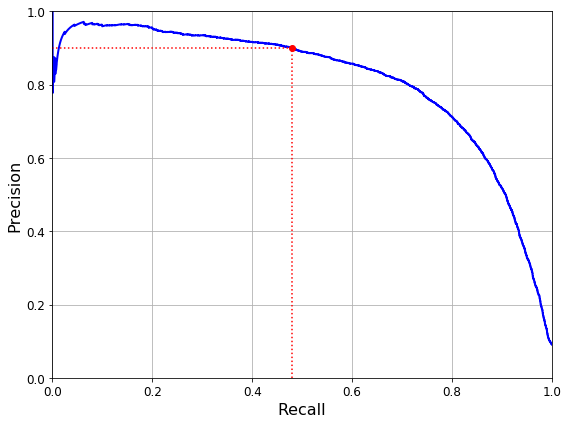

In [58]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [59]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [60]:
threshold_90_precision

3370.0194991439557

precision이 최소 90%가 목표라면 threshold가 최소 3370이면 된다는 것을 알 수 있습니다.

In [61]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [62]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [63]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

그 때의 precision은 90%이고 recall은 48%입니다.  
이는 위 그래프에서도 확인 할 수 있습니다.

---
## <span style="color:royalblue">3.3.5 ROC 곡선</span>
ROC(Receiver Operating Characteristic, 수신기 조작특성) 

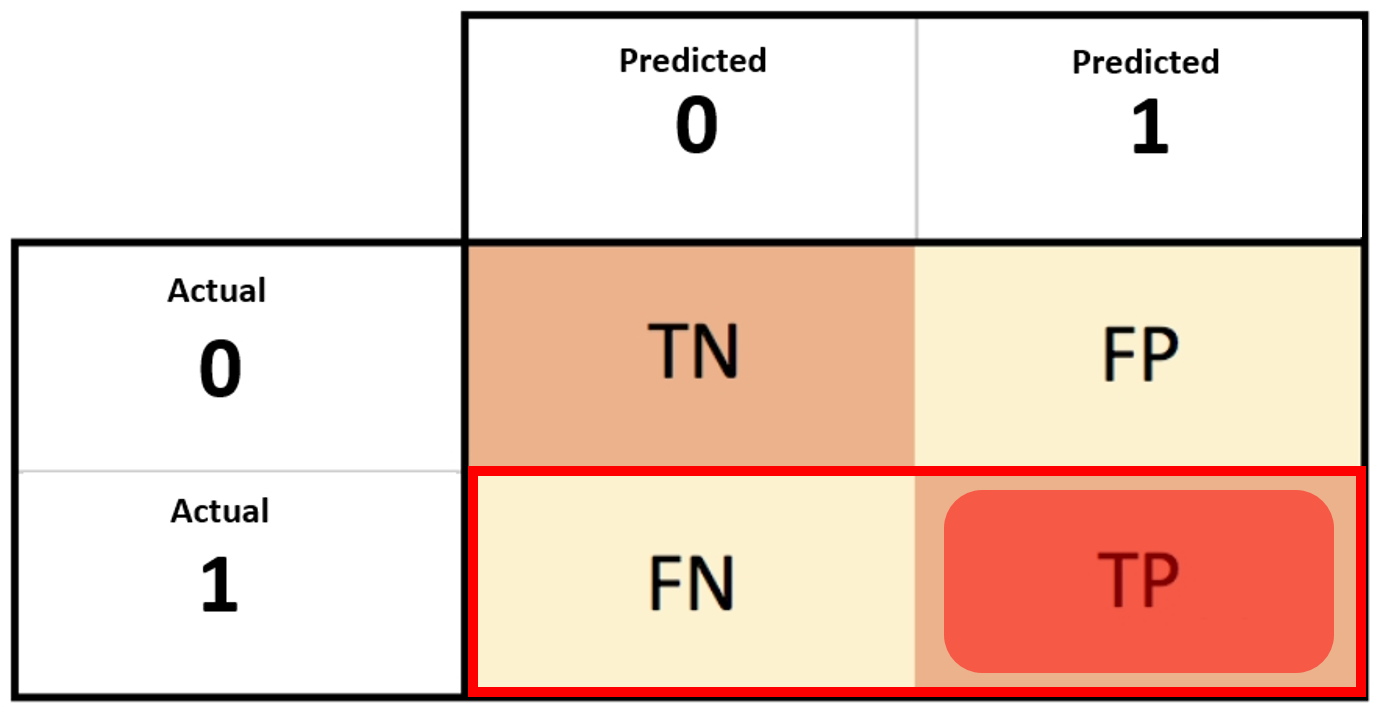
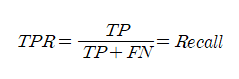

---

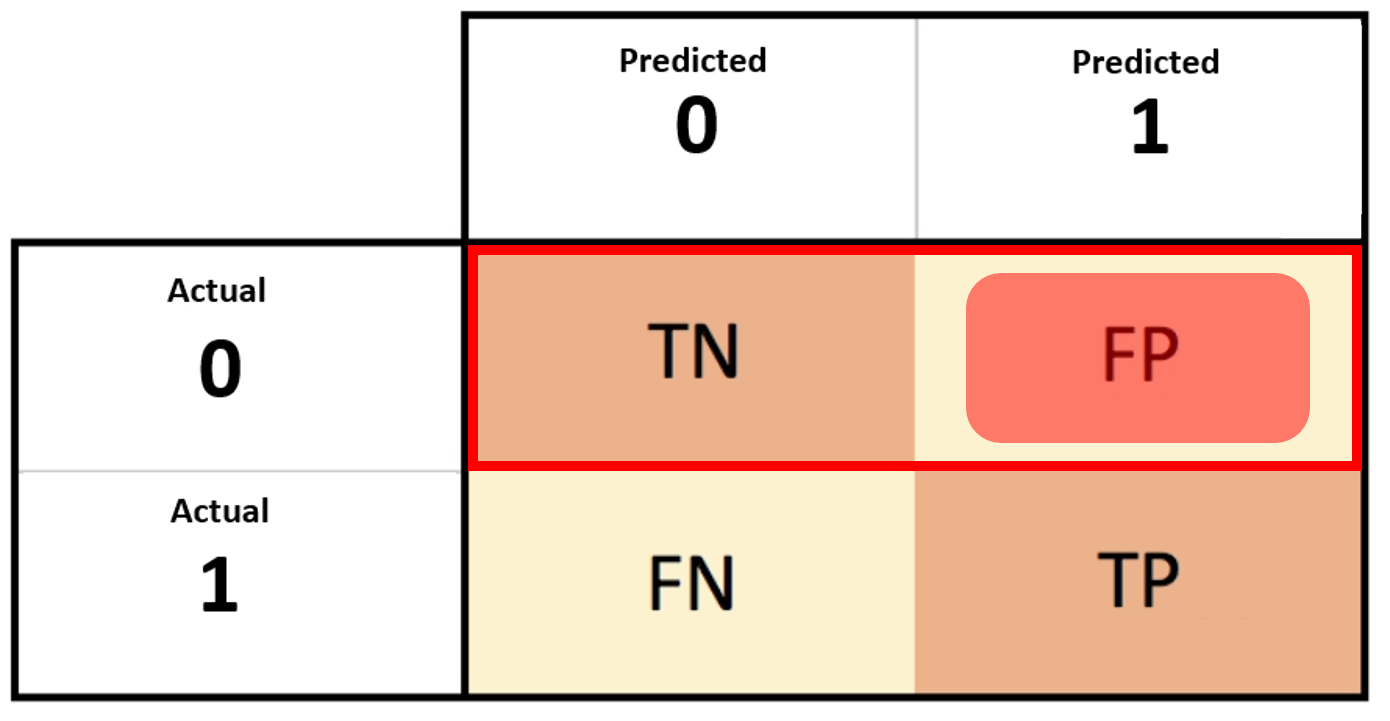
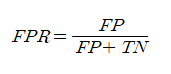

직전에 보았던 곡선은 Precision/Recall 곡선이었고  
이번에 알아볼 곡선인 ROC 곡선은 수신자 조작 특성 곡선이라 하여  
신호탐지이론에서 적중확률(TPR, Sensitivity(=Recall)) 대 오경보확률(FPR, 1 - Specificity) 그래프입니다.  
Specificity = TNR = TN / (TN + FP)  

즉, TPR/FPR 곡선이라 볼 수 있습니다.  
ROC 곡선을 그려봅니다.

In [64]:
from sklearn.metrics import roc_curve

# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
#                              method="decision_function")
# y_scores: Distance to hyperplane
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

그림 저장: roc_curve_plot


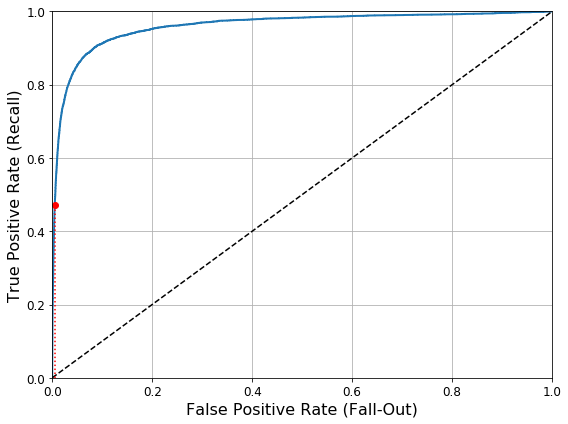

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # y = x
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

tpr_05_fpr = tpr[np.argmax(fpr >= 0.005)]
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([0.005, 0.005], [0., tpr_05_fpr], "r:")
plt.plot([0.0, 0.005], [tpr_05_fpr, tpr_05_fpr], "r:")
plt.plot([0.005], [tpr_05_fpr], "ro")
save_fig("roc_curve_plot")
plt.show()

ROC 곡선을 보고 분류기의 성능을 평가할 수 있는데 그 지표는 AUC(Area Under the Curve, 곡선 아래의 면적)입니다.  
완벽한 분류기는 AUC가 1이고, 완전 랜덤 분류기는 AUC가 0.5입니다.  
여기서 완전 랜덤 분류기란 훈련 데이터의 클래스 비율에 따라 무작위로 예측하는 것을 말합니다.

In [66]:
from sklearn.metrics import roc_auc_score

# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
#                              method="decision_function")
# y_scores: Distance to hyperplane
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)의 AUC는 0.96이 나왔습니다.  
AUC를 통해 성능을 비교하기 위해 새로운 분류기를 만들어 봅니다.  
새로 만들 분류기는 RandomForestClassifier입니다.  
RandomForest에 대한 자세한 내용은 7장에서 다룹니다.

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [68]:
y_probas_forest.shape

(60000, 2)

In [69]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

mehod="predict_proba"를 사용하면 반환값의 shape은 (n_samples, 2)로 1열은 0일 확률 2열은 1일확률을 나타냅니다.

In [70]:
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

그림 저장: roc_curve_comparison_plot


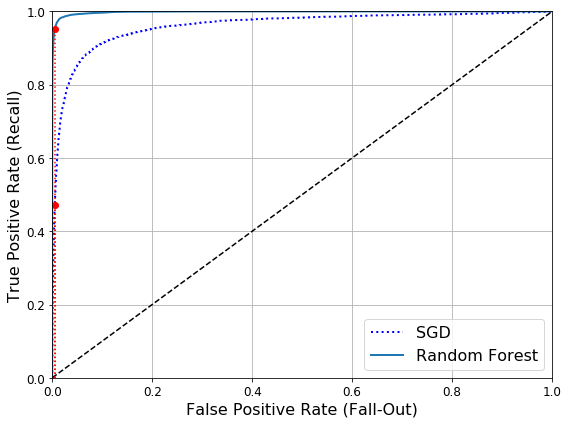

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

tpr_05_fpr = tpr[np.argmax(fpr >= 0.005)]
tpr_05_fpr_forest = tpr_forest[np.argmax(fpr_forest >= 0.005)]


plt.plot([0.005, 0.005], [0., tpr_05_fpr], "r:")
plt.plot([0.0, 0.005], [tpr_05_fpr, tpr_05_fpr], "r:")
plt.plot([0.005], [tpr_05_fpr], "ro")
plt.plot([0.005, 0.005], [0., tpr_05_fpr_forest], "r:")
plt.plot([0.0, 0.005], [tpr_05_fpr_forest, tpr_05_fpr_forest], "r:")
plt.plot([0.005], [tpr_05_fpr_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [72]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [73]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [74]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

RandomForestClassifier(n_estimators=100, random_state=42)의 AUC는 0.99로  
SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)의 AUC인 0.96보다 큰 걸로 보아 더 성능이 좋다고 예상할 수 있습니다.

두 분류기의 AUC뿐만 아니라 Precision과 Recall을 보면  
RandomForestClassifier는 0.99, 0.86으로  
SGDClassifier의 0.83, 0.65보다 큰 것을 볼 수 있습니다.

그림 저장: precision_recall_vs_threshold_forest_plot


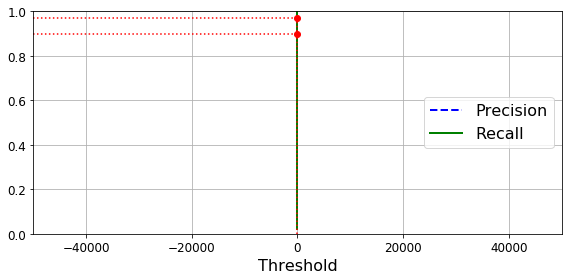

In [75]:
prcsn_frst, rcl_frst, thr_frst = precision_recall_curve(y_train_5, y_scores_forest)

def plot_precision_recall_vs_threshold_forest(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([0, 1, 0, 1])

rcl_90_prcsn_frst = rcl_frst[np.argmax(prcsn_frst >= 0.90)]
thr_90_prcsn_frst = thr_frst[np.argmax(prcsn_frst >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(prcsn_frst, rcl_frst, thr_frst)
plt.plot([thr_90_prcsn_frst, thr_90_prcsn_frst], [0., rcl_90_prcsn_frst], "r:")
plt.plot([-50000, thr_90_prcsn_frst], [0.9, 0.9], "r:")
plt.plot([-50000, thr_90_prcsn_frst], [rcl_90_prcsn_frst, rcl_90_prcsn_frst], "r:")
plt.plot([thr_90_prcsn_frst], [0.9], "ro")
plt.plot([thr_90_prcsn_frst], [rcl_90_prcsn_frst], "ro")
save_fig("precision_recall_vs_threshold_forest_plot")
plt.show()

그림 저장: precision_vs_recall_forest_plot


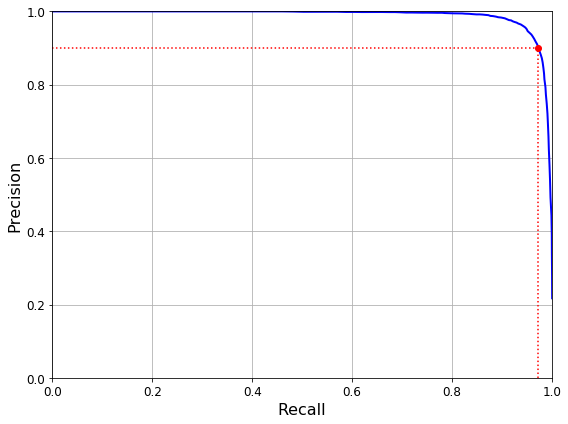

In [76]:
rcl_90_prcsn_frst = rcl_frst[np.argmax(prcsn_frst >= 0.90)]
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(prcsn_frst, rcl_frst)
plt.plot([rcl_90_prcsn_frst, rcl_90_prcsn_frst], [0., 0.9], "r:")
plt.plot([0.0, rcl_90_prcsn_frst], [0.9, 0.9], "r:")
plt.plot([rcl_90_prcsn_frst], [0.9], "ro")
save_fig("precision_vs_recall_forest_plot")
plt.show()

precision_recall_vs_threshold와 precision_vs_recall 그래프를 그려봐도  
SGDClassifier보다 좋은 것을 볼 수 있습니다.